In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib --user

--2023-12-24 14:40:55--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-24 14:40:56--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-24 14:40:57--  http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netix.dl.sourceforg

/home/arinmis/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [2]:
# Gerekli kütüphaneleri import edin
import yfinance as yf
import pandas as pd
import talib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go
from datetime import date
import seaborn as sns


ModuleNotFoundError: No module named 'talib'

In [ ]:
symbols = ["AEFES.IS", "AGHOL.IS", "AKBNK.IS", "AKFGY.IS", "AKSA.IS", "AKSEN.IS", "ALARK.IS", "ALBRK.IS", "ALGYO.IS", "ALKIM.IS", "ARCLK.IS", "ASELS.IS", "AYDEM.IS", "BAGFS.IS", "BERA.IS", "BIMAS.IS", "BRYAT.IS", "BUCIM.IS", "CCOLA.IS", "CEMTS.IS", "CIMSA.IS", "DEVA.IS", "DOAS.IS", "DOHOL.IS", "ECILC.IS", "EGEEN.IS", "EKGYO.IS", "ENJSA.IS", "ENKAI.IS", "ERBOS.IS", "EREGL.IS", "FROTO.IS", "GARAN.IS", "GENIL.IS", "GESAN.IS", "GLYHO.IS", "GOZDE.IS", "GSDHO.IS", "GUBRF.IS", "GWIND.IS", "HALKB.IS", "HEKTS.IS", "IPEKE.IS", "ISCTR.IS", "ISDMR.IS", "ISFIN.IS", "ISGYO.IS", "ISMEN.IS", "JANTS.IS", "KARSN.IS", "KARTN.IS", "KCHOL.IS", "KONTR.IS", "KORDS.IS", "KOZAA.IS", "KOZAL.IS", "KRDMD.IS", "LOGO.IS", "MAVI.IS", "MGROS.IS", "NTHOL.IS", "NUGYO.IS", "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "PETKM.IS", "PGSUS.IS", "PRKAB.IS", "PSGYO.IS", "QUAGR.IS", "SAHOL.IS", "SASA.IS", "SELEC.IS", "SISE.IS", "SKBNK.IS", "SMRTG.IS", "SNGYO.IS", "SOKM.IS", "TAVHL.IS", "TCELL.IS", "THYAO.IS", "TKFEN.IS", "TMSN.IS", "TOASO.IS", "TRGYO.IS", "TSKB.IS", "TSPOR.IS", "TTKOM.IS", "TTRAK.IS", "TUKAS.IS", "TUPRS.IS", "TURSG.IS", "ULKER.IS", "VAKBN.IS", "VESBE.IS", "VESTL.IS", "YATAS.IS", "YKBNK.IS", "YYLGD.IS"]
# Veri çekme
start = '2022-01-01'
end = date.today().strftime('%Y-%m-%d')
data = yf.download(symbols, start, end)

In [ ]:
data = data.swaplevel(axis = "columns").sort_index(axis="columns")
data

In [23]:
paper = "^NSEBANK"

# Hisse senedi verilerini çekme
data = yf.download(paper, start, end)
data['ma7'] = data['Close'].rolling(window=7).mean()
data['ma21'] = data['Close'].rolling(window=21).mean()

# Create MACD
data['26ema'] = data['Close'].ewm(span=26).mean()
data['12ema'] = data['Close'].ewm(span=12).mean()
data['MACD'] = data['12ema']-data['26ema']

# Create Bollinger Bands
data['20sd'] = data['Close'].rolling(window = 21).std()
data['upper_band'] = data['ma21'] + (data['20sd']*2)
data['lower_band'] = data['ma21'] - (data['20sd']*2)

# Create Exponential moving average
data['ema'] = data['Close'].ewm(com=0.5).mean()

# Create Momentum
data['momentum'] = data['Close']-1
data['log_momentum'] = np.log(data['momentum'])

data = data.dropna()
data.head()
# # Teknik analiz göstergelerini hesaplama
# veri['EMA_5'] = talib.EMA(veri['Close'], timeperiod=5)
# veri['EMA_13'] = talib.EMA(veri['Close'], timeperiod=13)
# veri['EMA_50'] = talib.EMA(veri['Close'], timeperiod=50)
# veri['EMA_200'] = talib.EMA(veri['Close'], timeperiod=200)

# veri['RSI'] = talib.RSI(veri['Close'], timeperiod=14)

# # MACD göstergesi
# veri['macd'], veri['signal'], _ = talib.MACD(veri['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# # On-Balance Volume (OBV) göstergesi
# veri['OBV'] = talib.OBV(veri['Close'], veri['Volume'])

# # Grafiği oluştur
# plt.figure(figsize=(12, 8))

# # Kapanış fiyatları
# plt.subplot(2, 1, 1)
# plt.plot(veri['Close'], label='Kapanış Fiyatları', color='black')
# plt.plot(veri['EMA_5'], label='EMA 5', linestyle='--')
# plt.plot(veri['EMA_13'], label='EMA 13', linestyle='--')
# plt.plot(veri['EMA_50'], label='EMA 50', linestyle='--')
# plt.plot(veri['EMA_200'], label='EMA 200', linestyle='--')

# plt.title(f"{hisse_senedi} - Kapanış Fiyatları ve EMA")
# plt.xlabel("Tarih")
# plt.ylabel("Değerler")
# plt.legend()

# # MACD ve sinyal hattı
# plt.subplot(2, 1, 2)
# plt.plot(veri['macd'], label='MACD Histogram', color='purple')
# plt.plot(veri['signal'], label='MACD Signal', color='black')
# plt.title(f"{hisse_senedi} - MACD Histogram")
# plt.xlabel("Tarih")
# plt.ylabel("Değerler")
# plt.legend()

# # Grafikleri göster
# plt.tight_layout()
# plt.show()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,,,,,,
2022-02-01,38460.449219,38802.699219,37690.601562,38505.500000,38505.050781,234100,37768.707589,37868.828497,37918.538621,37944.391641,25.853020,589.114336,39047.057169,36690.599826,38302.353509,38504.500000,10.558530
2022-02-02,38841.550781,39386.601562,38752.648438,39330.500000,39330.042969,252600,38019.593192,38007.333333,38046.702968,38163.184292,116.481324,573.634710,39154.602754,36860.063913,38987.784503,39329.500000,10.579730
2022-02-03,39255.699219,39424.851562,38861.148438,39010.000000,39009.546875,193800,38314.228795,38110.659598,38132.705921,38296.318757,163.612835,547.720404,39206.100406,37015.218790,39002.594834,39009.000000,10.571548
2022-02-04,39128.000000,39278.601562,38562.601562,38789.351562,38788.902344,163100,38468.886161,38162.728795,38190.453018,38373.571801,183.118783,558.194122,39279.117039,37046.340551,38860.432653,38788.351562,10.565875
2022-02-07,38592.050781,38837.550781,37802.699219,37995.449219,37995.007812,241900,38470.792969,38186.785900,38173.538464,38314.491960,140.953495,538.294281,39263.374462,37110.197339,38283.777030,37994.449219,10.545195


<Figure size 1600x1000 with 0 Axes>

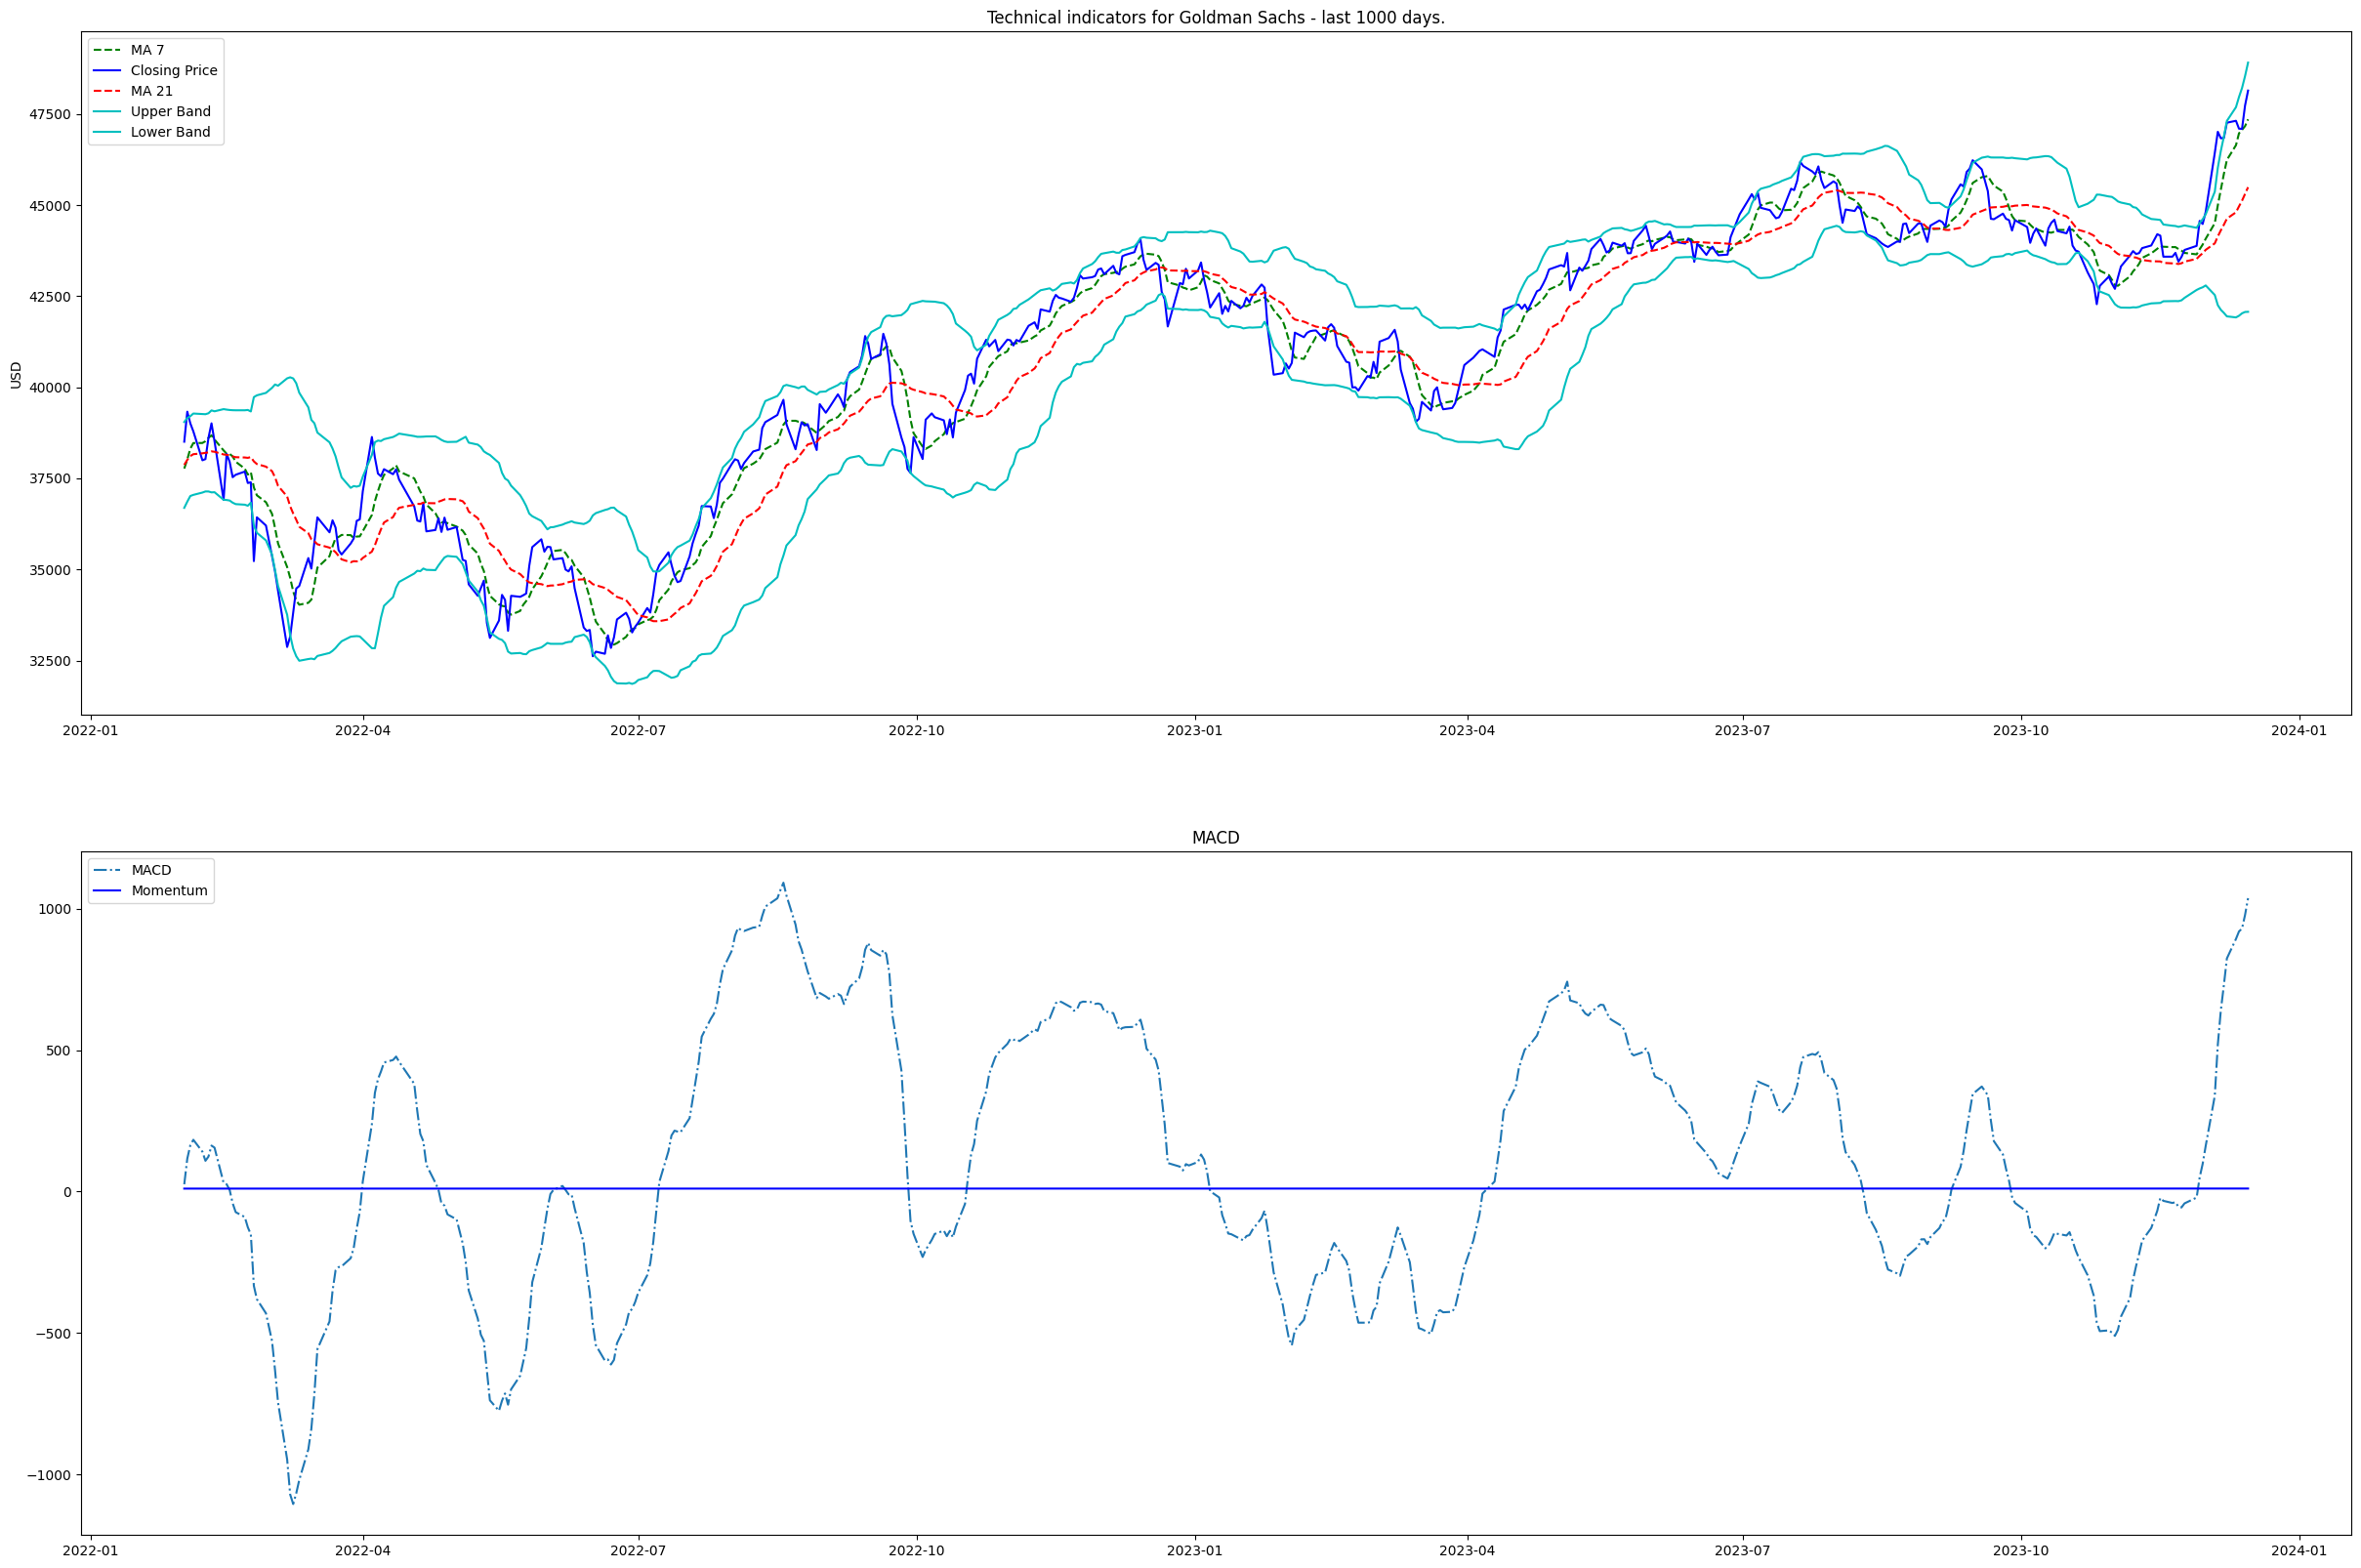

In [24]:


plt.figure(figsize=(16, 10), dpi=100)
shape_0 = data.shape[0]
xmacd_ = shape_0-1000

data = data.iloc[-1000:, :]
x_ = range(3, data.shape[0])
x_ =list(data.index)

plt.figure(figsize=(30,20))
# Plot first subplot
plt.subplot(2, 1, 1)
plt.plot(data['ma7'],label='MA 7', color='g',linestyle='--')
plt.plot(data['Close'],label='Closing Price', color='b')
plt.plot(data['ma21'],label='MA 21', color='r',linestyle='--')
plt.plot(data['upper_band'],label='Upper Band', color='Introduction:
d

Text(0.5, 1.0, 'Params')

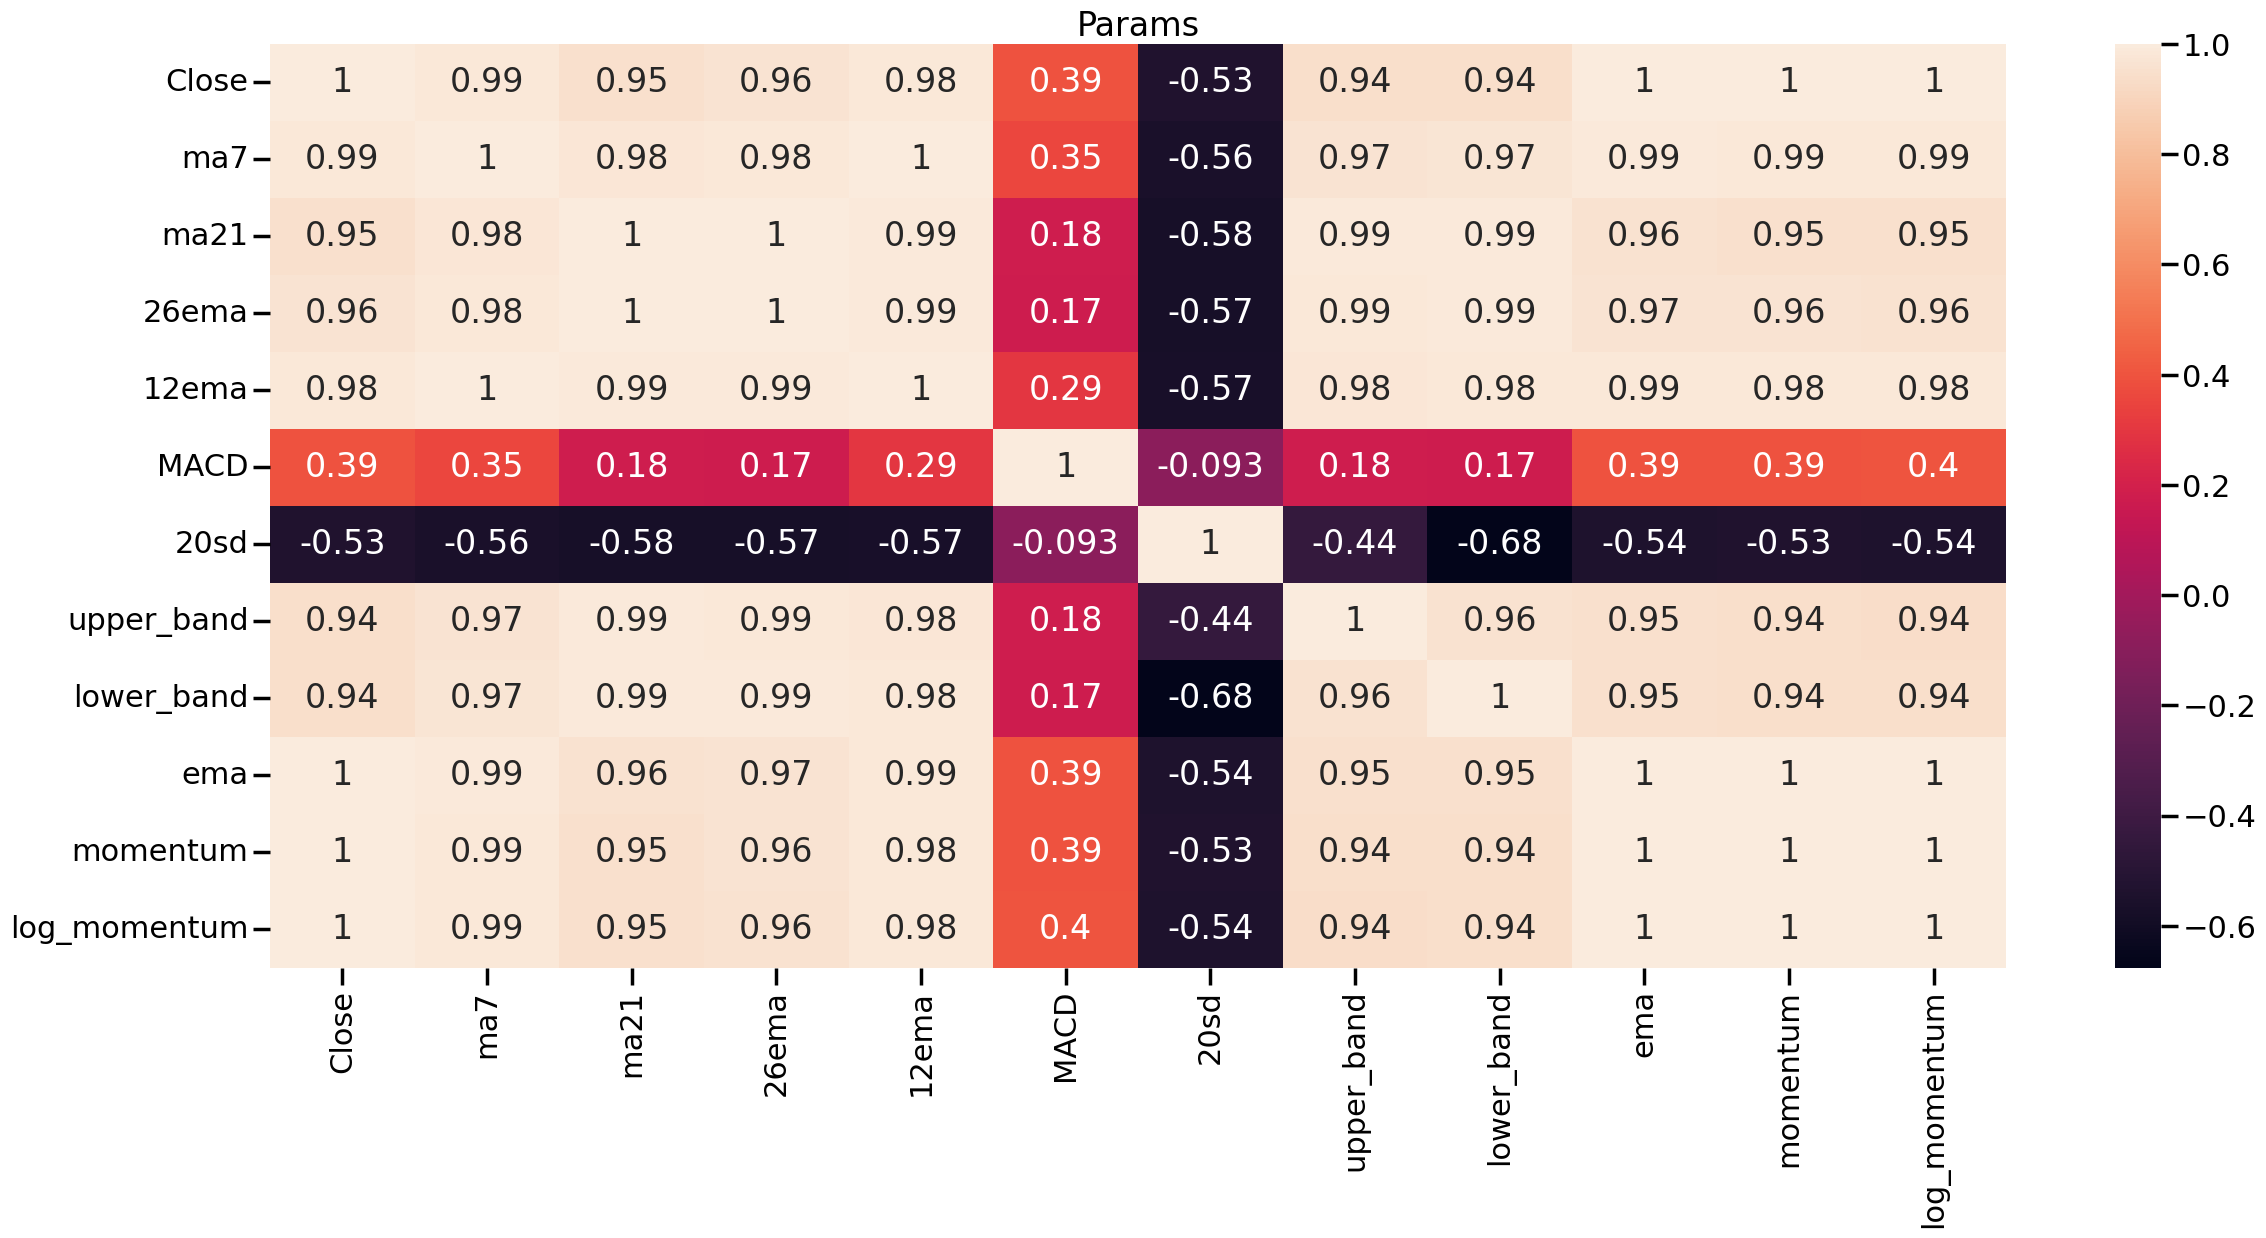

In [33]:

features = data
kolonlar_cikar = ['Volume', 'Open', 'Adj Close', 'High', 'Low']
features = features.drop(kolonlar_cikar, axis=1)
# features['ma7'] = data['ma7']
# features['ma21'] = data['ma21']
# features['26ema'] = data['26ema']
# features['12ema'] = data['12ema']
# features['MACD'] = data['MACD']
# features['20sd'] = data['20sd']
# features['upper_bound'] = data['upper_bound']
# features['lower_bound'] = data['lower_bound']
# features['ema'] = data['ema']
# features['momentum'] = data['momentum']
# features['log_momentum'] = data['log_momentum']


plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(features.corr(), annot = True).set_title('Params')

In [ ]:
# Hisse senedi sembolü
hisse_senedi = "TUPRS.IS"

# Hisse senedi verilerini çekme
veri = yf.download(hisse_senedi, start='2022-01-16', end='2023-01-20')

# Teknik analiz göstergelerini hesaplama
veri['EMA_5'] = talib.EMA(veri['Close'], timeperiod=5)
veri['EMA_13'] = talib.EMA(veri['Close'], timeperiod=13)
veri['EMA_50'] = talib.EMA(veri['Close'], timeperiod=50)
veri['EMA_200'] = talib.EMA(veri['Close'], timeperiod=200)
veri['RSI'] = talib.RSI(veri['Close'], timeperiod=14)
veri['macd'], veri['signal'], _ = talib.MACD(veri['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
veri['OBV'] = talib.OBV(veri['Close'], veri['Volume'])

# Hedef değişkeni oluşturma (1 günlük ileriye dönük kapanış fiyatı)
veri['Target'] = veri['Close'].shift(-1)

# NaN değerleri temizleme
veri = veri.dropna()

# Veriyi sınıflandırma için hazırlama
veri['Target'] = np.where(veri['Close'].shift(-1) > veri['Close'], 1, 0)

# Özellikler (features) ve hedef değişkeni (target)
features = veri[['Close', 'EMA_5', 'EMA_13', 'EMA_50', 'EMA_200', 'RSI', 'macd', 'OBV']]
target = veri['Target']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Classifier modelini oluşturma ve eğitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Tahminleri yapma
y_pred_test = rf_classifier.predict(X_test)

# Accuracy, F1 skoru ve classification report
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Test Seti Accuracy:", accuracy_test)
print("Test Seti F1 Skoru:", f1_test)

# Classification report
print("\nTest Seti Classification Report:")
print(classification_report(y_test, y_pred_test))
print(f'F1 Score: {f1}')

# Random Forest Classifier modelini oluşturma ve eğitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)

# Son gözlemlerin özelliklerini al
son_gozlem_features = features.iloc[-1, :].values.reshape(1, -1)

# Tahmin yapma
tahmin = rf_classifier.predict(son_gozlem_features)

if tahmin == 1:
    print("Bir sonraki candlestick yukarı yönlü olabilir.")
else:
    print("Bir sonraki candlestick aşağı yönlü olabilir.")

print(tahmin)

print("son_gozlem_features:", son_gozlem_features)
print("Raw prediction values:", tahmin)

[*********************100%%**********************]  1 of 1 completed
Test Seti Accuracy: 0.6666666666666666
Test Seti F1 Skoru: 0.7142857142857143

Test Seti Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.56      0.71         9

    accuracy                           0.67        12
   macro avg       0.71      0.78      0.66        12
weighted avg       0.86      0.67      0.69        12

F1 Score: 0.7142857142857143


<ipython-input-65-52984c717bf1>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bir sonraki candlestick aşağı yönlü olabilir.
[0]
son_gozlem_features: [[8.37142868e+01 7.86518184e+01 7.50076718e+01 6.82163046e+01
  5.06567413e+01 7.19006957e+01 2.97519565e+00 1.59134814e+09]]
Raw prediction values: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
fig = go.Figure(data=[go.Candlestick(x=veri.index,
                open=veri['Open'],
                high=veri['High'],
                low=veri['Low'],
                close=veri['Close'])])

fig.update_layout(title=f'{hisse_senedi} Candlestick Grafiği',
                  xaxis_title='Tarih',
                  yaxis_title='Fiyat',
                  xaxis_rangeslider_visible=False)

fig.show()

In [ ]:
selected_papers = ["AKBNK.IS", "ASELS.IS", "BIMAS.IS", "ENJSA.IS", "EREGL.IS",
                   "KOZAL.IS", "MAVI.IS", "PGSUS.IS", "THYAO.IS", "TTKOM.IS"]

# EMA (Exponential Moving Average) indikatörleri
veri['EMA_5'] = talib.EMA(veri['Close'], timeperiod=5)
veri['EMA_8'] = talib.EMA(veri['Close'], timeperiod=8)
veri['EMA_9'] = talib.EMA(veri['Close'], timeperiod=9)
veri['EMA_13'] = talib.EMA(veri['Close'], timeperiod=13)
veri['EMA_50'] = talib.EMA(veri['Close'], timeperiod=50)
veri['EMA_200'] = talib.EMA(veri['Close'], timeperiod=200)

# MFI (Money Flow Index) indikatörü
veri['MFI'] = talib.MFI(veri['High'], veri['Low'], veri['Close'], veri['Volume'], timeperiod=14)

# MACD indikatörü
macd, signal, _ = talib.MACD(veri['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
veri['MACD'] = macd

# RSI (Relative Strength Index) indikatörü
veri['RSI'] = talib.RSI(veri['Close'], timeperiod=14)

# Hacim (Volume) indikatörü
veri['Volume'] = veri['Volume']

# Hedef değişkeni oluşturmak (örneğin, 1: fiyat yükselecek, 0: fiyat düşecek)
veri['Target'] = (veri['Close'].shift(-1) > veri['Close']).astype(int)

# NaN değerleri temizleme
veri.dropna(inplace=True)

# Özellikler ve hedef değişkeni
ozellikler = ['Open','High','Low','Close','EMA_5', 'EMA_8', 'EMA_9', 'EMA_13', 'EMA_50', 'EMA_200', 'MFI', 'MACD', 'RSI', 'Volume']
X = veri[ozellikler]
y = veri['Target']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest modelini eğitme
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test setinde modelin performansını değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(f'F1 Score: {f1}')